In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv("churn-bigml-20 (1).csv")


In [32]:
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [33]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [34]:
df.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [35]:
# Check for Missing Values
df.isnull().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

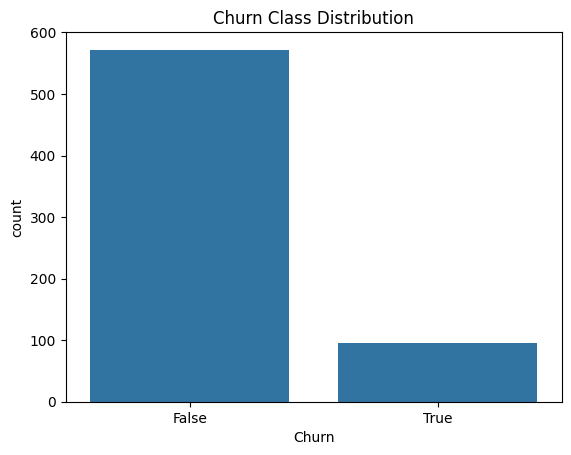

In [36]:
# Target Variable

df["Churn"].value_counts()
sns.countplot(x="Churn", data=df)
plt.title("Churn Class Distribution")
plt.show()


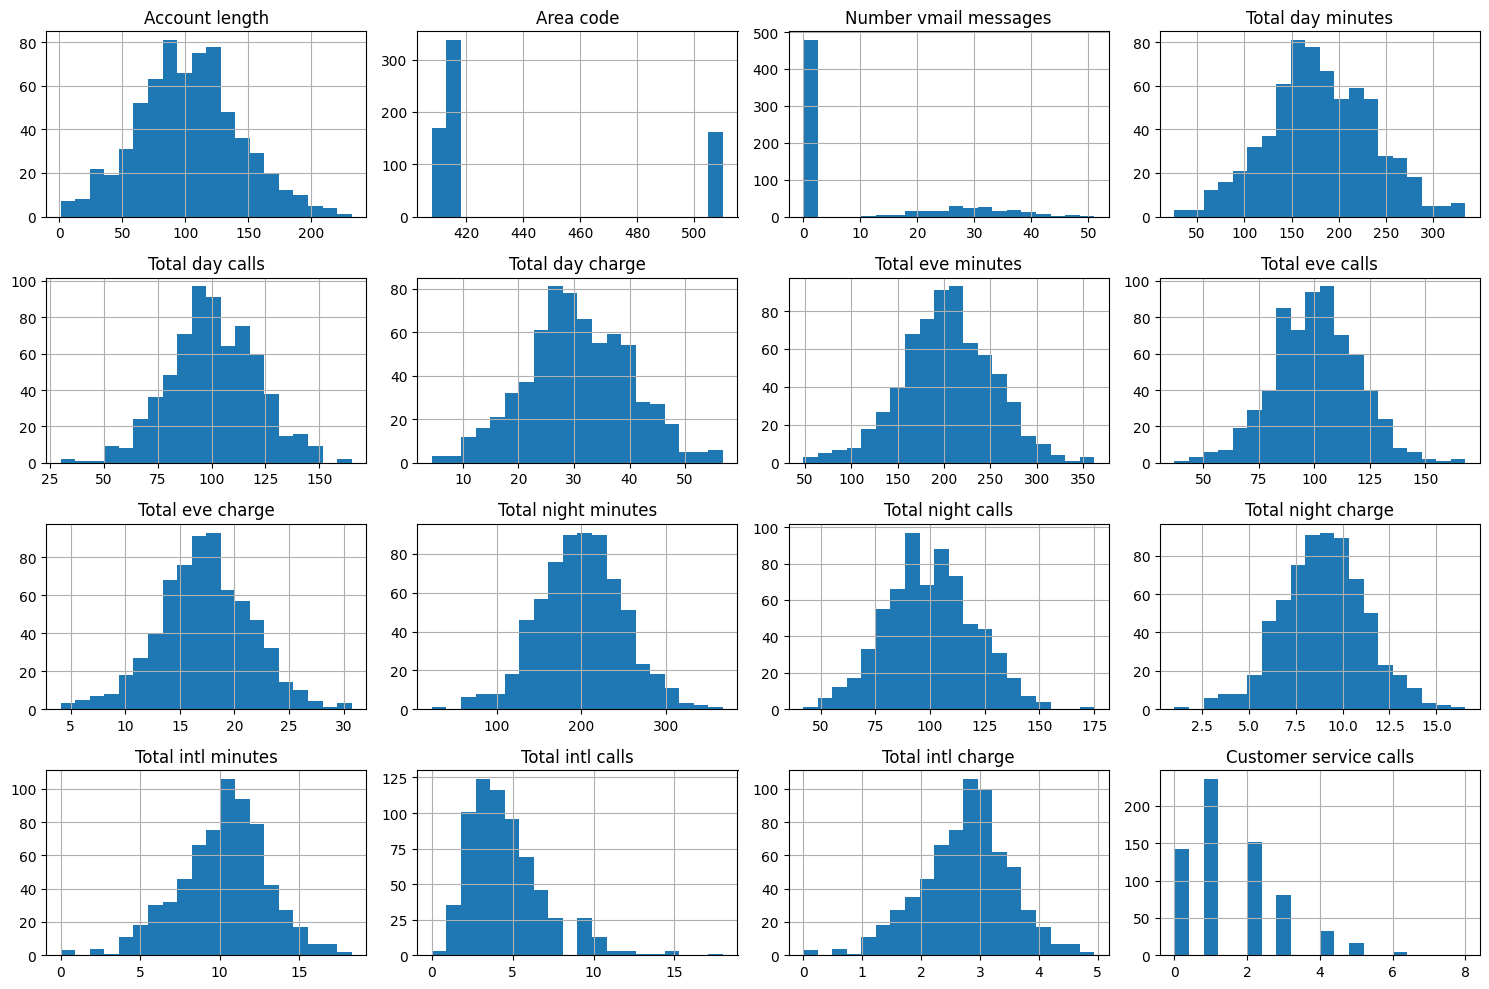

In [37]:
# Numeric Data
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


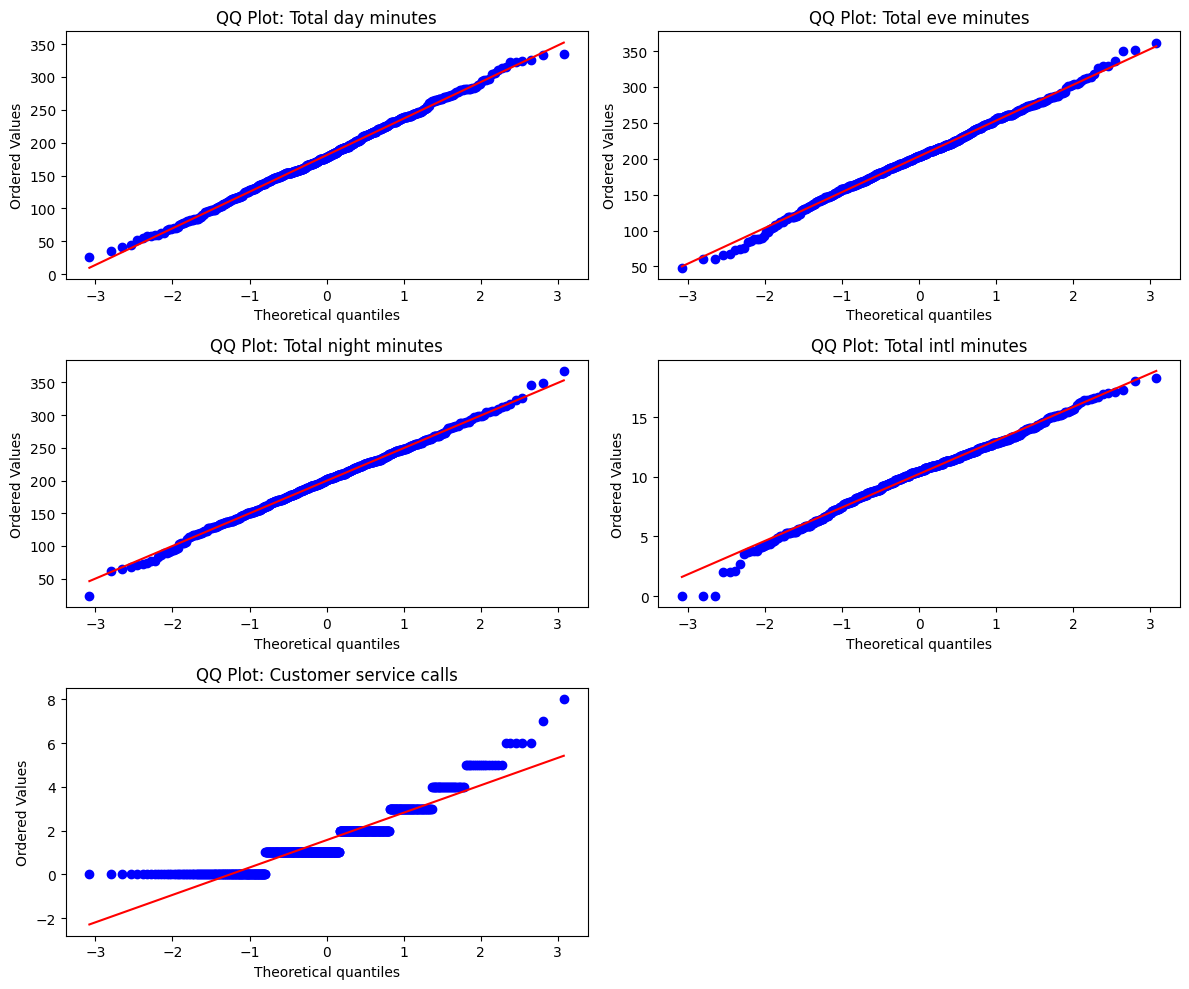

In [38]:
from scipy import stats
qq_features = [
    "Total day minutes",
    "Total eve minutes",
    "Total night minutes",
    "Total intl minutes",
    "Customer service calls"
]

plt.figure(figsize=(12, 10))

for i, col in enumerate(qq_features, 1):
    plt.subplot(3, 2, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot: {col}")

plt.tight_layout()
plt.show()


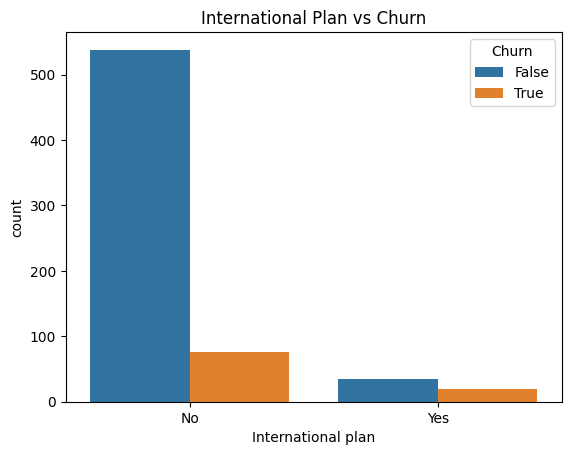

In [39]:
# Categorical Data
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns
categorical_cols
df["International plan"].value_counts()
sns.countplot(x="International plan", hue="Churn", data=df)
plt.title("International Plan vs Churn")
plt.show()


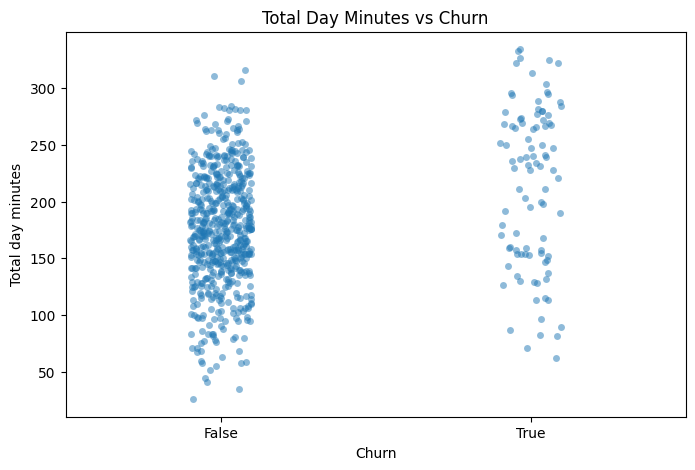

In [40]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x="Churn",
    y="Total day minutes",
    data=df,
    jitter=True,
    alpha=0.5
)
plt.title("Total Day Minutes vs Churn")
plt.show()


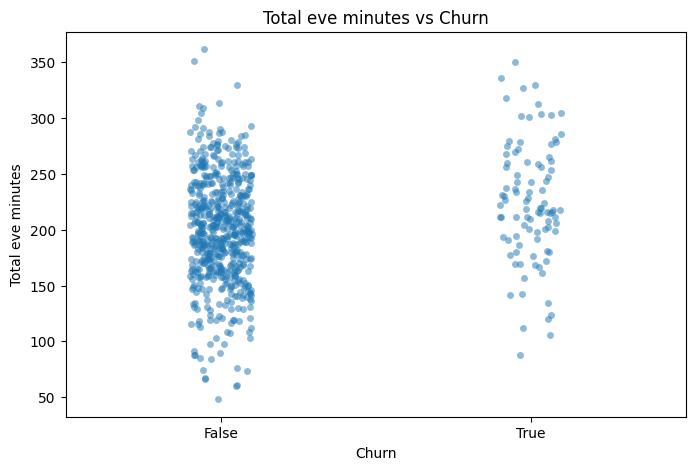

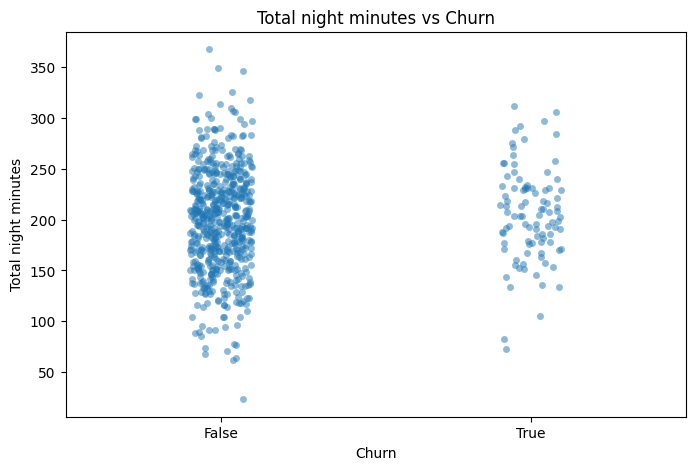

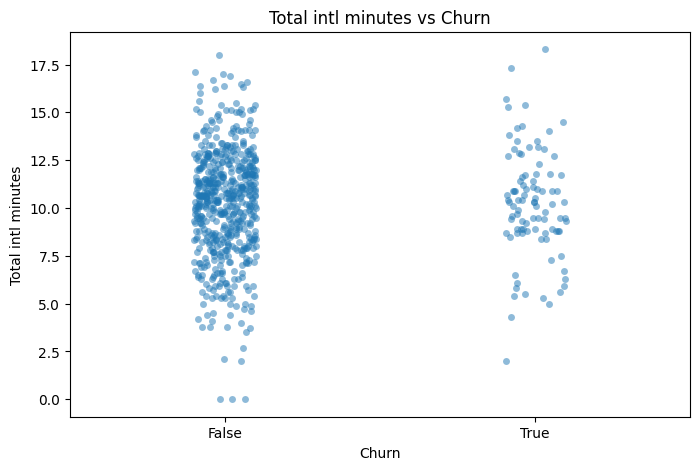

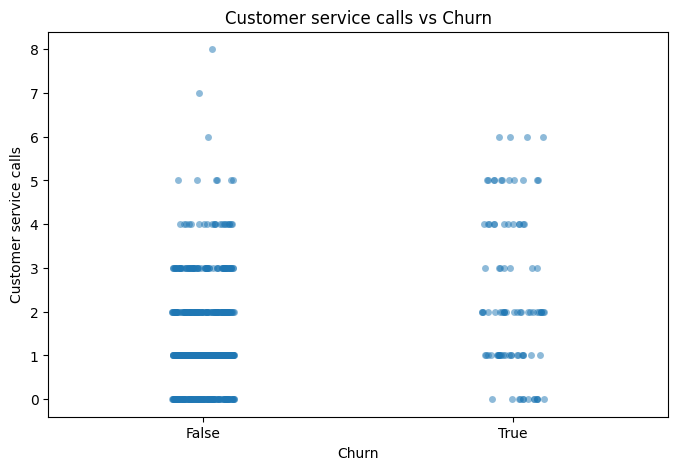

In [41]:
features_to_plot = [
    "Total eve minutes",
    "Total night minutes",
    "Total intl minutes",
    "Customer service calls"
]

for col in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.stripplot(
        x="Churn",
        y=col,
        data=df,
        jitter=True,
        alpha=0.5
    )
    plt.title(f"{col} vs Churn")
    plt.show()


In [42]:
# Feature Creation

df["day_intensity"] = df["Total day minutes"] / df["Account length"]

#cost ratio
df["day_cost_per_min"] = df["Total day charge"] / df["Total day minutes"]
# Customer Service Stress indicator
df["high_service_calls"] = (df["Customer service calls"] >= 4).astype(int)
# create binary indicators
df["intl_plan_flag"] = (df["International plan"] == "Yes").astype(int)
df["vmail_plan_flag"] = (df["Voice mail plan"] == "Yes").astype(int)



In [43]:
pd.crosstab(df["International plan"], df["Churn"], normalize="index")


Churn,False,True
International plan,,
No,0.876221,0.123779
Yes,0.641509,0.358491


In [44]:
df["Total day minutes"].describe(percentiles=[0.95, 0.99])


count    667.000000
mean     180.948126
std       55.508628
min       25.900000
50%      178.300000
95%      272.960000
99%      314.016000
max      334.300000
Name: Total day minutes, dtype: float64

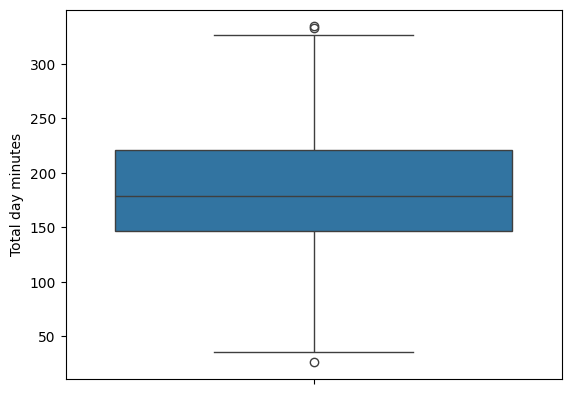

In [45]:
sns.boxplot(y=df["Total day minutes"])
plt.show()



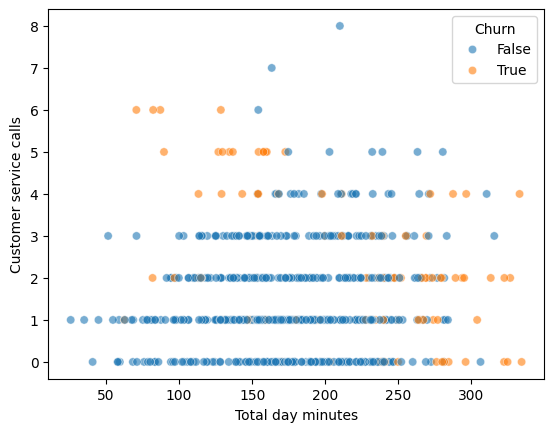

In [46]:
sns.scatterplot(
    data=df,
    x="Total day minutes",
    y="Customer service calls",
    hue="Churn",
    alpha=0.6
)
plt.show()


Usage doesn't seem to be a strong indicator of churn as much as service calls does. 

In [47]:
df_pre = df.copy()

# No Missing-Value

In [48]:
# Normalize Common String Values (consistency cleanup)
#   - trims whitespace
#   - normalizes case for Yes/No-like fields

# Identify object columns
obj_cols = df_pre.select_dtypes(include=["object"]).columns.tolist()

for c in obj_cols:
    df_pre[c] = df_pre[c].astype(str).str.strip()

# Common yes/no normalization
yes_set = {"yes", "y", "true", "t", "1"}
no_set  = {"no", "n", "false", "f", "0"}

def normalize_yes_no(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    if s in yes_set:
        return "Yes"
    if s in no_set:
        return "No"
    return x  # leave untouched if not clearly yes/no

for c in obj_cols:
    # only apply if the column looks like it contains yes/no values
    sample = df_pre[c].dropna().astype(str).str.lower().head(200).unique().tolist()
    if any(v in yes_set or v in no_set for v in sample):
        df_pre[c] = df_pre[c].apply(normalize_yes_no)

display(df_pre[obj_cols].head())

,State,International plan,Voice mail plan
0,LA,No,No
1,IN,No,No
2,NY,No,No
3,SC,No,No
4,HI,No,No


In [49]:
# Fix Data Types

# Categorical identifiers
df["State"] = df["State"].astype("category")
df["Area code"] = df["Area code"].astype("category")

# Binary plan indicators
df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})
df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})

df.dtypes

State                     category
Account length               int64
Area code                 category
International plan           int64
Voice mail plan              int64
Number vmail messages        int64
Total day minutes          float64
Total day calls              int64
Total day charge           float64
Total eve minutes          float64
Total eve calls              int64
Total eve charge           float64
Total night minutes        float64
Total night calls            int64
Total night charge         float64
Total intl minutes         float64
Total intl calls             int64
Total intl charge          float64
Customer service calls       int64
Churn                         bool
day_intensity              float64
day_cost_per_min           float64
high_service_calls           int64
intl_plan_flag               int64
vmail_plan_flag              int64
dtype: object

In [50]:
# Create a copy of the original dataframe for feature engineering
df_fe = df.copy()

df_fe['total_minutes'] = (
    df_fe['Total day minutes'] +
    df_fe['Total eve minutes'] +
    df_fe['Total night minutes'] +
    df_fe['Total intl minutes']
)

df_fe['total_charges'] = (
    df_fe['Total day charge'] +
    df_fe['Total eve charge'] +
    df_fe['Total night charge'] +
    df_fe['Total intl charge']
)

df_fe['high_service_calls'] = (
    df_fe['Customer service calls'] >= 3
).astype(int)

df_fe['intl_usage_ratio'] = (
    df_fe['Total intl minutes'] / df_fe['total_minutes']
)

df_fe['intl_usage_ratio'] = df_fe['intl_usage_ratio'].fillna(0)

df_fe['account_length_group'] = pd.cut(
    df_fe['Account length'],
    bins=[0, 50, 150, df_fe['Account length'].max()],
    labels=['new', 'mid', 'long']
)

categorical_cols = [
    'International plan',
    'Voice mail plan',
    'account_length_group'
]

df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

numeric_cols = df_fe.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('Churn', errors='ignore')

scaler = StandardScaler()
df_fe[numeric_cols] = scaler.fit_transform(df_fe[numeric_cols])

X = df_fe.drop('Churn', axis=1)
y = df_fe['Churn']

In [51]:
# Basic structure check
df_fe.shape

(667, 30)

In [52]:
# Column types and non-null counts
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   State                      667 non-null    category
 1   Account length             667 non-null    float64 
 2   Area code                  667 non-null    category
 3   Number vmail messages      667 non-null    float64 
 4   Total day minutes          667 non-null    float64 
 5   Total day calls            667 non-null    float64 
 6   Total day charge           667 non-null    float64 
 7   Total eve minutes          667 non-null    float64 
 8   Total eve calls            667 non-null    float64 
 9   Total eve charge           667 non-null    float64 
 10  Total night minutes        667 non-null    float64 
 11  Total night calls          667 non-null    float64 
 12  Total night charge         667 non-null    float64 
 13  Total intl minutes         667 non-

In [53]:
# Quick preview
df_fe.head()

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,high_service_calls,intl_plan_flag,vmail_plan_flag,total_minutes,total_charges,intl_usage_ratio,International plan_1,Voice mail plan_1,account_length_group_mid,account_length_group_long
0,LA,0.347127,408,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,...,-0.510754,-0.293801,-0.628806,1.872992,1.278517,-1.114416,False,False,True,False
1,IN,-0.927731,415,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,...,1.957890,-0.293801,-0.628806,-0.170298,-0.529281,0.770712,False,False,True,False
2,NY,1.425853,415,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,...,1.957890,-0.293801,-0.628806,2.504555,3.072132,-1.981562,False,False,False,True
3,SC,0.200028,415,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,...,-0.510754,-0.293801,-0.628806,-1.679969,-1.772614,-0.060653,False,False,True,False
4,HI,-1.319994,510,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,...,-0.510754,-0.293801,-0.628806,-0.788351,-0.964211,0.634980,False,False,False,False


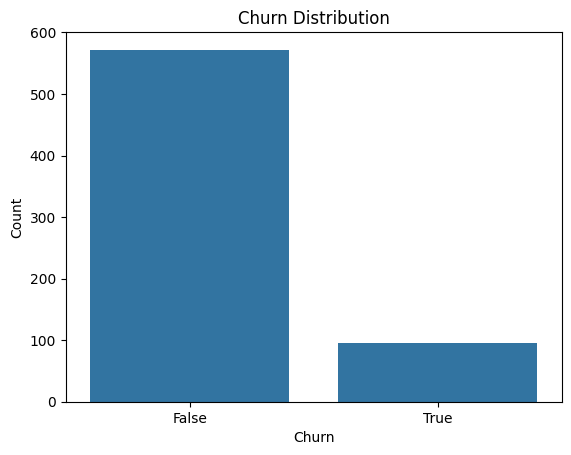

In [54]:
sns.countplot(x="Churn", data=df_fe)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [55]:
# Churn rate
df_fe["Churn"].value_counts(normalize=True)

Churn
False    0.857571
True     0.142429
Name: proportion, dtype: float64

In [56]:
# Confirm no missing values remain
df_fe.isnull().sum().sort_values(ascending=False)

State                        0
Account length               0
Area code                    0
Number vmail messages        0
Total day minutes            0
Total day calls              0
Total day charge             0
Total eve minutes            0
Total eve calls              0
Total eve charge             0
Total night minutes          0
Total night calls            0
Total night charge           0
Total intl minutes           0
Total intl calls             0
Total intl charge            0
Customer service calls       0
Churn                        0
day_intensity                0
day_cost_per_min             0
high_service_calls           0
intl_plan_flag               0
vmail_plan_flag              0
total_minutes                0
total_charges                0
intl_usage_ratio             0
International plan_1         0
Voice mail plan_1            0
account_length_group_mid     0
account_length_group_long    0
dtype: int64

In [57]:
# Percentage missing (should be 0s)
(df_fe.isnull().mean() * 100).sort_values(ascending=False)

State                        0.0
Account length               0.0
Area code                    0.0
Number vmail messages        0.0
Total day minutes            0.0
Total day calls              0.0
Total day charge             0.0
Total eve minutes            0.0
Total eve calls              0.0
Total eve charge             0.0
Total night minutes          0.0
Total night calls            0.0
Total night charge           0.0
Total intl minutes           0.0
Total intl calls             0.0
Total intl charge            0.0
Customer service calls       0.0
Churn                        0.0
day_intensity                0.0
day_cost_per_min             0.0
high_service_calls           0.0
intl_plan_flag               0.0
vmail_plan_flag              0.0
total_minutes                0.0
total_charges                0.0
intl_usage_ratio             0.0
International plan_1         0.0
Voice mail plan_1            0.0
account_length_group_mid     0.0
account_length_group_long    0.0
dtype: flo

In [58]:
# Summary statistics for numeric variables
df_fe.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,667.0,-4.261126e-17,1.00075,-2.496786,-0.658049,-0.020620,0.616808,3.166524
Number vmail messages,667.0,4.660606e-17,1.00075,-0.601245,-0.601245,-0.601245,0.828963,3.045784
Total day minutes,667.0,1.318286e-16,1.00075,-2.795322,-0.625563,-0.047742,0.716676,2.764741
Total day calls,667.0,-5.592728e-17,1.00075,-3.480463,-0.659276,0.003089,0.689987,3.143193
Total day charge,667.0,1.904191e-16,1.00075,-2.795703,-0.625891,-0.047911,0.716720,2.764573
Total eve minutes,667.0,1.917507e-16,1.00075,-3.124982,-0.650242,0.006938,0.666130,3.189178
Total eve calls,667.0,3.462165e-16,1.00075,-3.352519,-0.658959,0.027635,0.661414,3.566233
Total eve charge,667.0,-5.219879e-16,1.00075,-3.124625,-0.650075,0.005858,0.665343,3.188436
Total night minutes,667.0,-3.102632e-16,1.00075,-3.549397,-0.638247,0.038507,0.639844,3.379040
Total night calls,667.0,-3.402243e-16,1.00075,-2.883011,-0.700187,-0.005653,0.664077,3.715070


In [59]:
num_cols = df_fe.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'day_intensity', 'day_cost_per_min', 'high_service_calls',
       'intl_plan_flag', 'vmail_plan_flag', 'total_minutes', 'total_charges',
       'intl_usage_ratio'],
      dtype='object')

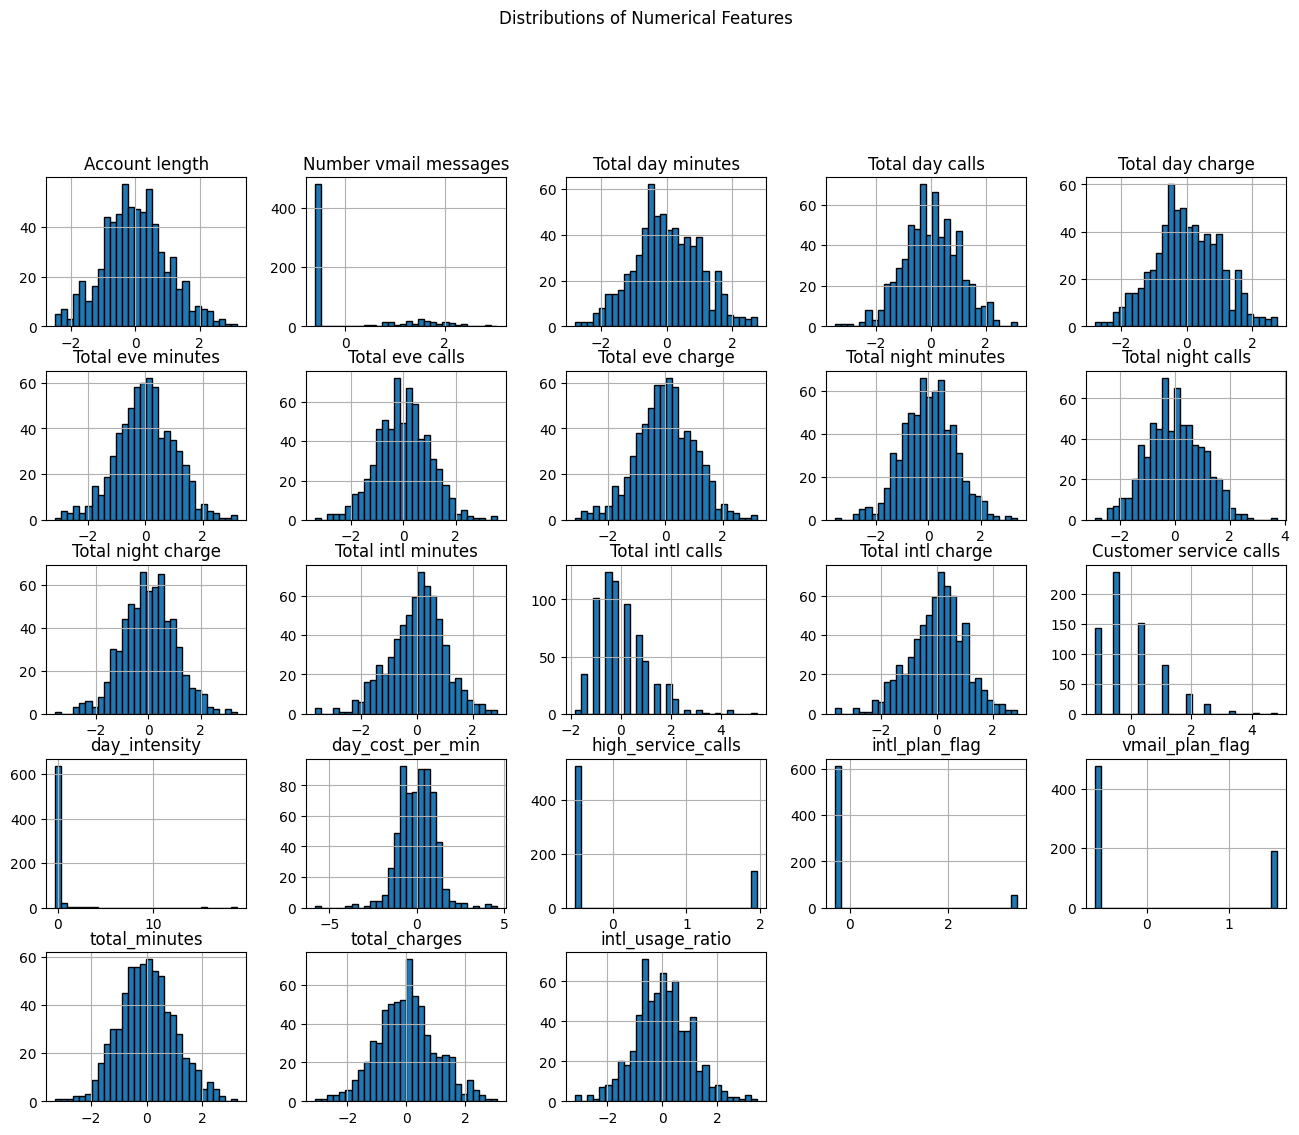

In [60]:
df_fe[num_cols].hist(
    figsize=(16, 12),
    bins=30,
    edgecolor="black"
)
plt.suptitle("Distributions of Numerical Features", y=1.02)
plt.show()

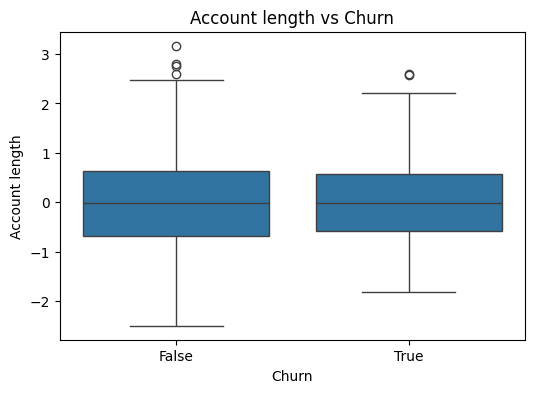

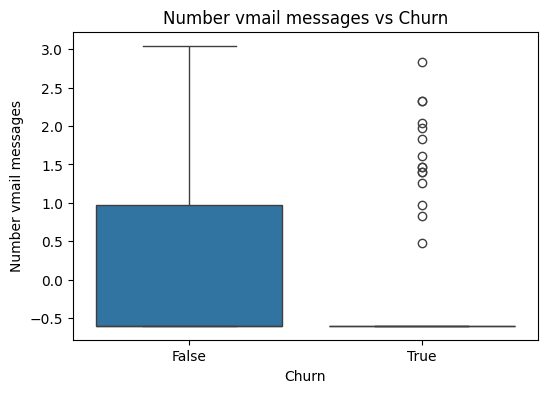

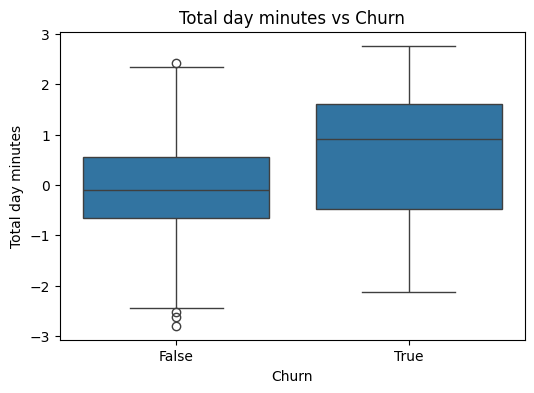

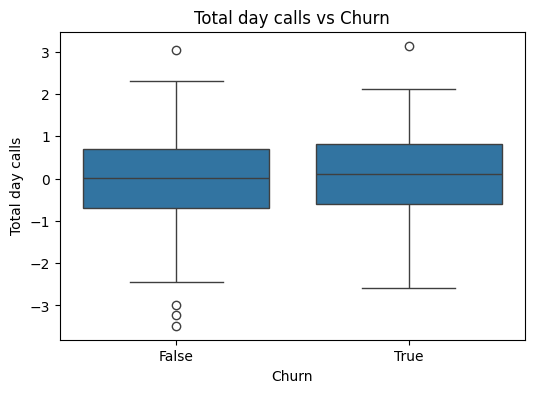

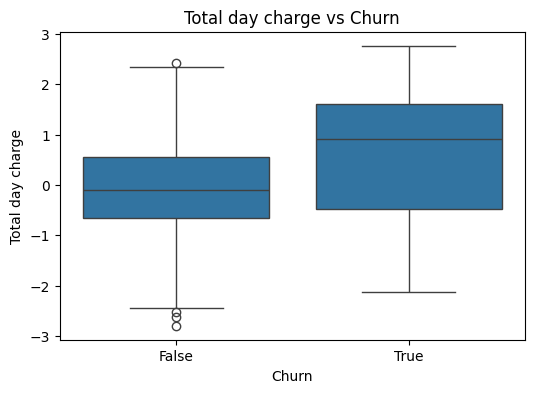

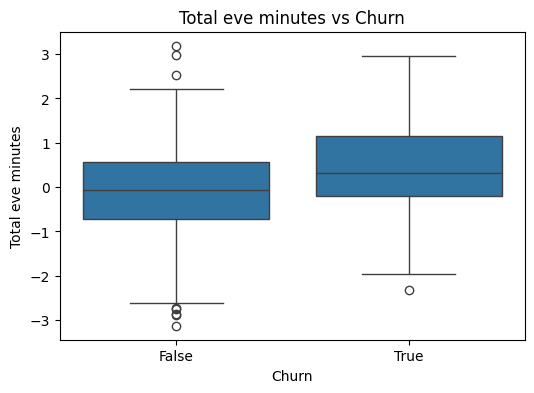

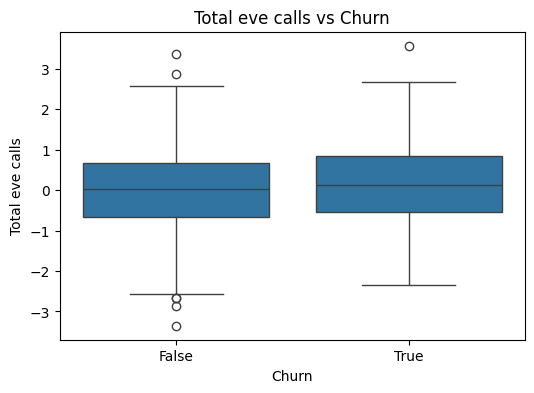

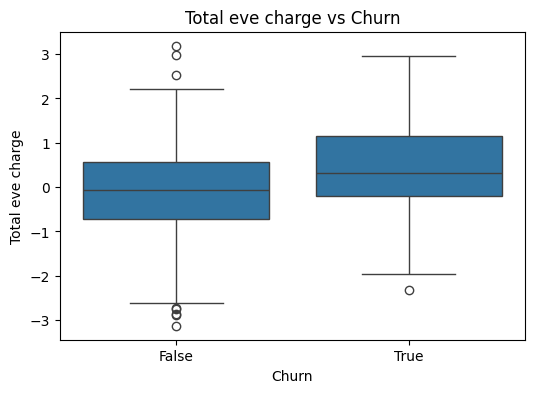

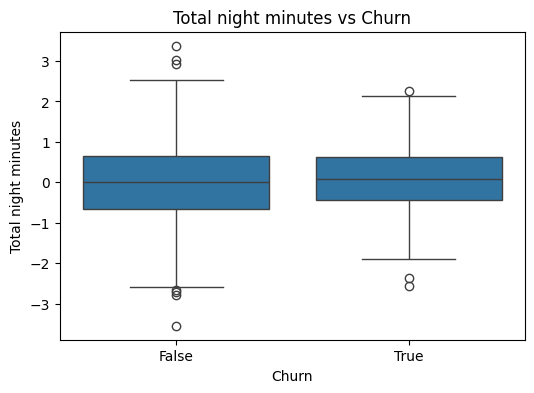

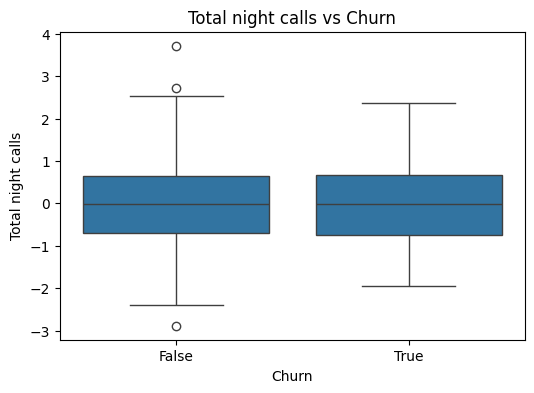

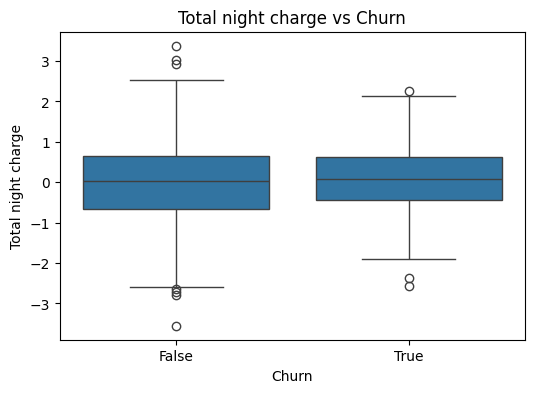

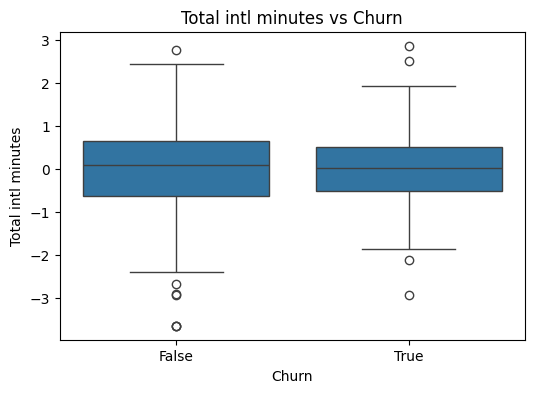

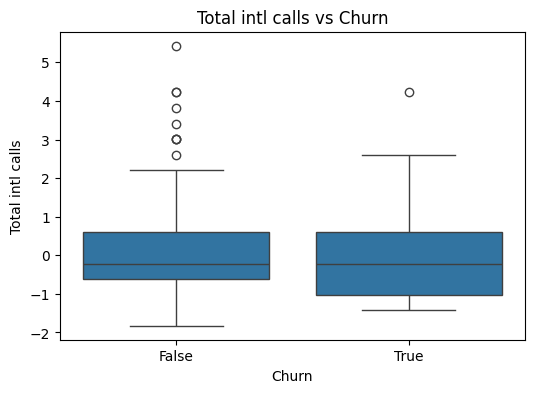

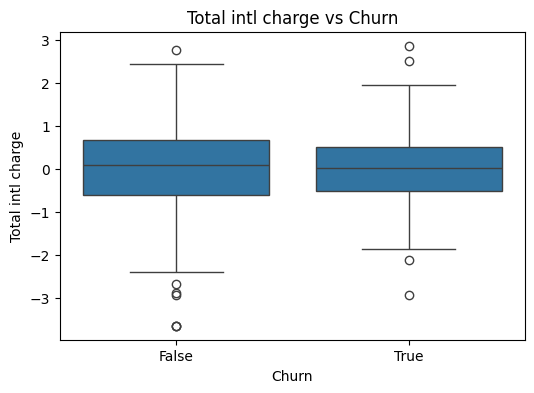

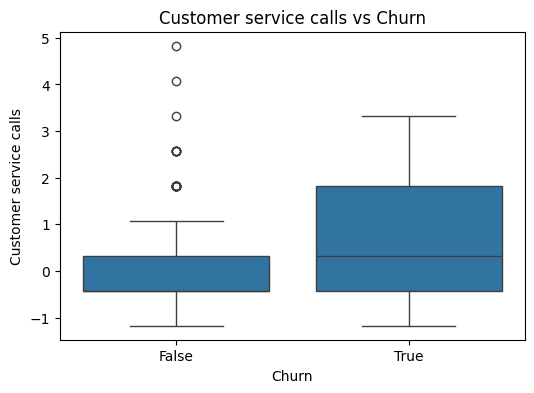

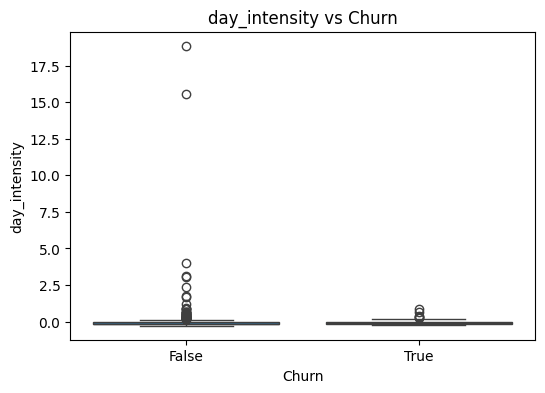

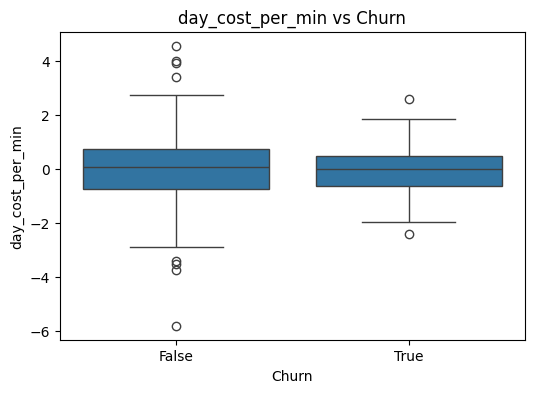

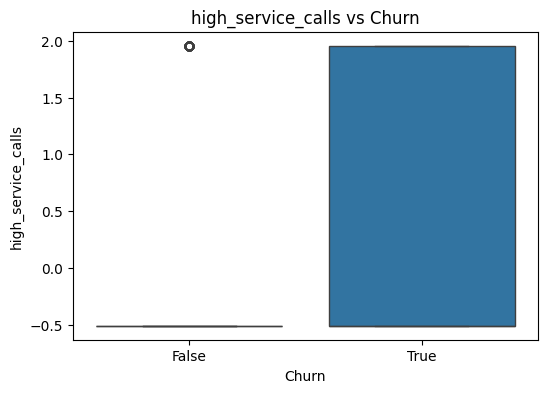

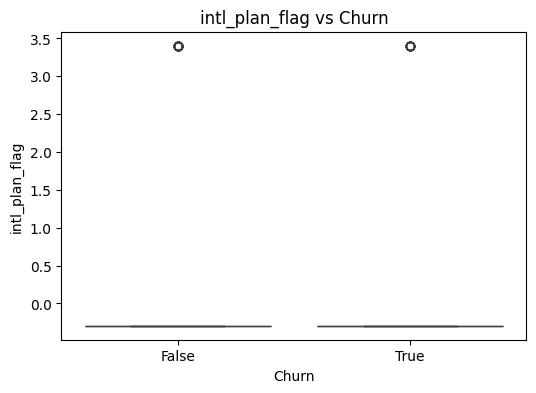

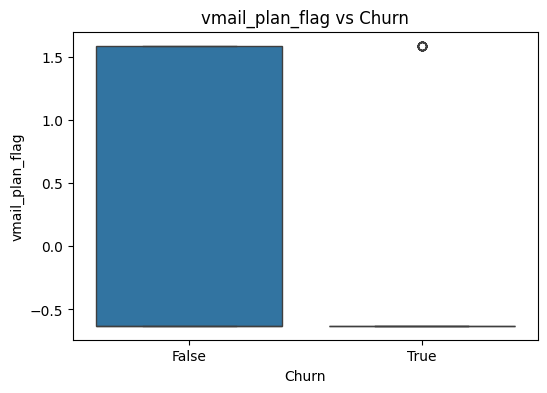

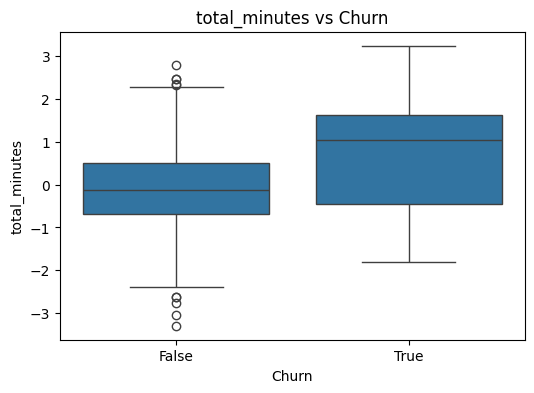

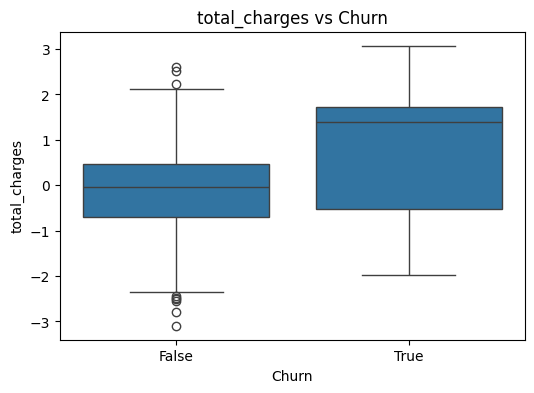

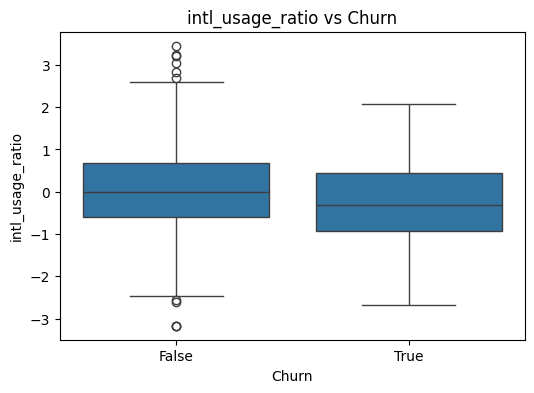

In [61]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Churn", y=col, data=df_fe)
    plt.title(f"{col} vs Churn")
    plt.show()

In [62]:
cat_cols = df_fe.select_dtypes(include=["object", "category"]).columns
cat_cols

Index(['State', 'Area code'], dtype='object')

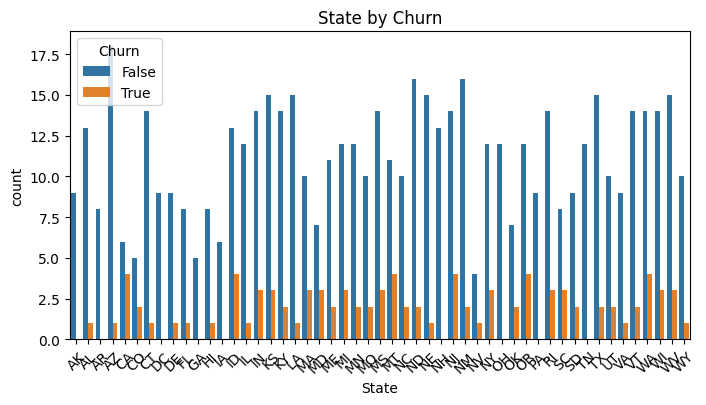

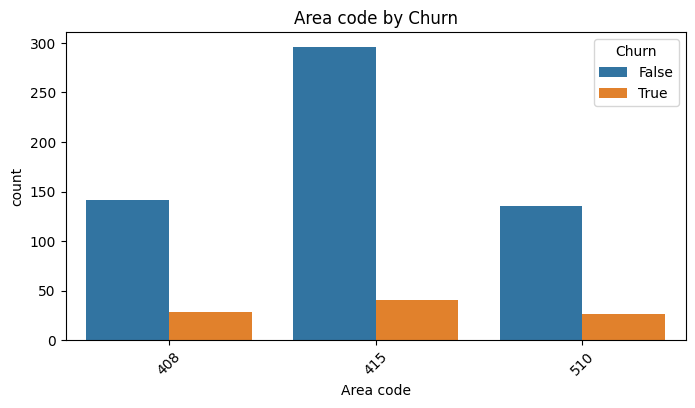

In [63]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue="Churn", data=df_fe)
    plt.title(f"{col} by Churn")
    plt.xticks(rotation=45)
    plt.show()

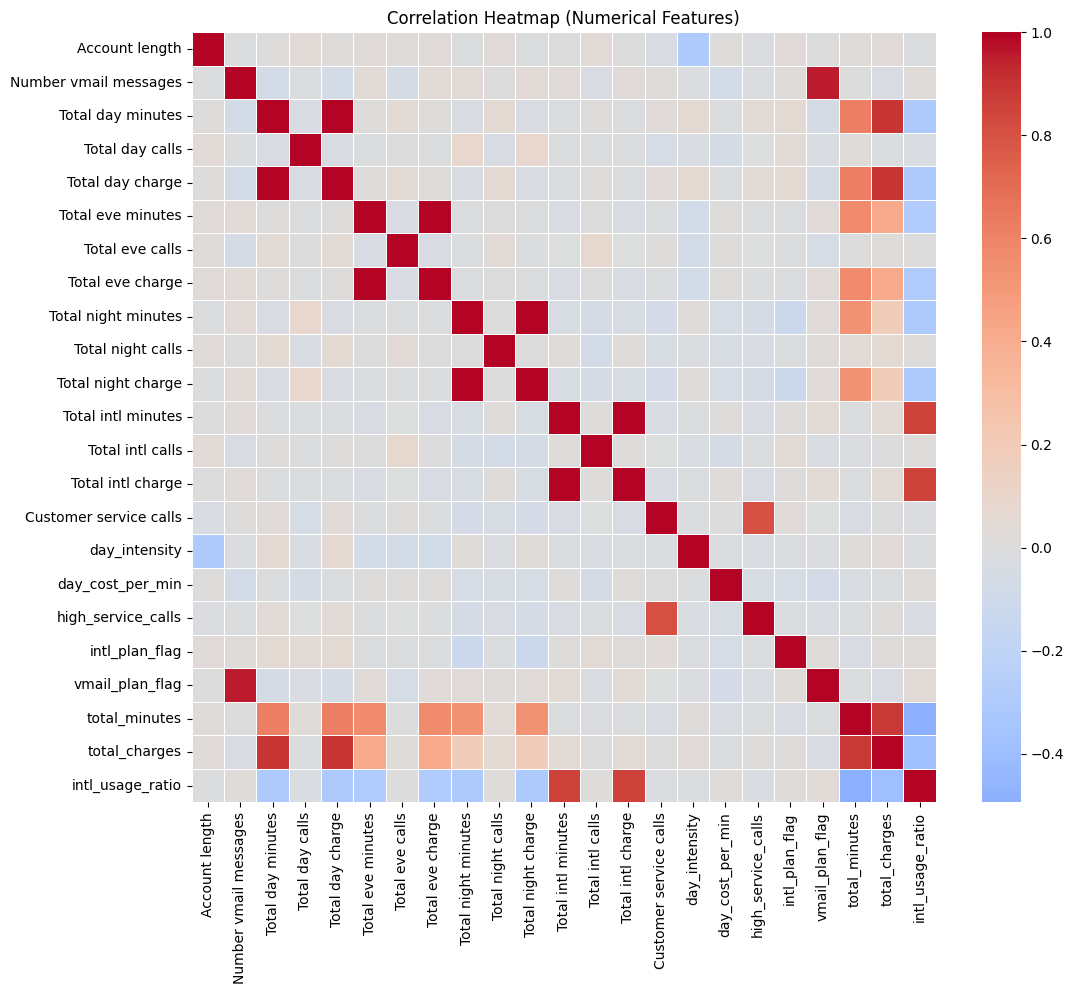

In [64]:
corr_matrix = df_fe[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [65]:
df_fe.groupby("Churn")[num_cols].mean().T

Churn,False,True
Account length,-0.005019,0.030219
Number vmail messages,0.041724,-0.251220
Total day minutes,-0.098941,0.595732
Total day calls,-0.007890,0.047505
Total day charge,-0.098940,0.595721
Total eve minutes,-0.071569,0.430919
Total eve calls,-0.022687,0.136600
Total eve charge,-0.071570,0.430925
Total night minutes,-0.017496,0.105341
Total night calls,0.007183,-0.043252


In [68]:
# Numeric columns only (exclude target)
num_cols = df_fe.select_dtypes(include=["int64", "float64"]).columns

# Compute correlation against boolean churn (implicitly treated as 0/1)
churn_corr = (
    df_fe[num_cols]
    .apply(lambda x: x.corr(df_fe["Churn"]))
    .sort_values(ascending=False)
)

churn_corr

total_charges             0.295394
total_minutes             0.273737
Total day minutes         0.242781
Total day charge          0.242777
Customer service calls    0.233259
intl_plan_flag            0.181634
Total eve charge          0.175616
Total eve minutes         0.175614
high_service_calls        0.151913
Total eve calls           0.055669
Total night charge        0.042958
Total night minutes       0.042930
Total day calls           0.019360
Total intl calls          0.015331
Account length            0.012315
Total intl charge        -0.003681
Total intl minutes       -0.003740
day_cost_per_min         -0.013156
Total night calls        -0.017626
day_intensity            -0.018193
Number vmail messages    -0.102381
intl_usage_ratio         -0.105906
vmail_plan_flag          -0.113465
dtype: float64